# Bases de datos en Python

## Índice
1. [Acceso a bases de datos relacionales](#sql)
2. [Crear bases de datos relacionales](#crear)

<a id="sql"></a>
## Acceso a bases de datos relacionales

Podemos acceder a bases de datos SQL con la librería `pymysql`. Para instalarla escribimos en Anaconda Prompt:  
`conda install -c anaconda pymysql`

In [2]:
import pymysql

#### Ejemplo 1
Vamos a conectarnos a la base de datos NBA, que contiene estadísticas de partidos de una temporada.  
Utilizaremos los siguientes parámetros:  
* servidor: relational.fit.cvut.cz
* usuario: guest
* contraseña: relational  
* base de datos: NBA  

![image.png](https://relational.fit.cvut.cz/assets/img/datasets-generated/NBA.svg)

Vamos a crear una conexión con la base de datos

In [3]:
database_host = 'relational.fit.cvut.cz'
username = 'guest'
password = 'relational'
database_name = 'NBA'

db = pymysql.connect(host=database_host,
                     user=username,
                     password=password,
                     database=database_name)
cursor = db.cursor()

La función `connect()` crea una conexión a la base de datos. Un *cursor* nos permite realizar operaciones con los datos almacenados en la base de datos. 

<img src='https://i.ibb.co/L8HH0G5/cursor.png'>  

Una vez creado el cursor, podemos empezar a ejecutar comandos sobre el contenido de la base de datos utilizando el métido `execute()`,

Al ejecutar queries, utilizamos los métodos `fetchone()` (primera fila) o `fectchall()` (todas las filas) para visizar los resultados de las consultas. Para cerrar la conexión, utilizamso el método `close()`

In [4]:
cursor.execute('SELECT * FROM Player')
cursor.fetchall()

((1, 'Nicolas Batum'),
 (2, 'LaMarcus Aldridge'),
 (3, 'Robin Lopez'),
 (4, 'Wesley Matthews'),
 (5, 'Damian Lillard'),
 (6, 'Thomas Robinson'),
 (7, 'Maurice Williams'),
 (8, 'Will Barton'),
 (9, 'Dorell Wright'),
 (10, 'Earl Watson'),
 (11, 'CJ McCollum'),
 (12, 'Meyers Leonard'),
 (13, 'Victor Claver'),
 (14, 'Kent Bazemore'),
 (15, 'Pau Gasol'),
 (16, 'Chris Kaman'),
 (17, 'Jodie Meeks'),
 (18, 'Kendall Marshall'),
 (19, 'Steve Nash'),
 (20, 'Xavier Henry'),
 (21, 'Robert Sacre'),
 (22, 'Ryan Kelly'),
 (23, 'Nick Young'),
 (24, 'Marshon Brooks'),
 (25, 'Jordan Hill'),
 (26, 'Wesley Johnson'),
 (27, 'Andre Iguodala'),
 (28, 'Draymond Green'),
 (29, "Jermaine O'Neal"),
 (30, 'Klay Thompson'),
 (31, 'Stephen Curry'),
 (32, 'Marreese Speights'),
 (33, 'Harrison Barnes'),
 (34, 'Steve Blake'),
 (35, 'Jordan Crawford'),
 (36, 'Hilton Armstrong'),
 (37, 'Andrew Bogut'),
 (38, 'David Lee'),
 (39, 'Shawn Marion'),
 (40, 'Dirk Nowitzki'),
 (41, 'Samuel Dalembert'),
 (42, 'Monta Ellis'),
 (43

Podemos ver las tablas de la base de datos con la query `SHOW TABLES`

In [5]:
cursor.execute('SHOW TABLES')
cursor.fetchall()

(('Actions',),
 ('Game',),
 ('Player',),
 ('Team',),
 ('joined_drafted_all_players_original',))

In [6]:
cursor.close()

La función `read_sql()` de pandas nos permite crear dataframes a partir de queries. Con este método no es necesario crear un cursor

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

query = 'SELECT * FROM Actions WHERE TeamId=25'
df = pd.read_sql(query, db)
df

,GameId,TeamId,PlayerId,Minutes,FieldGoalsMade,FieldGoalAttempts,3PointsMade,3PointAttempts,FreeThrowsMade,FreeThrowAttempts,...,DefensiveRebounds,TotalRebounds,Assists,PersonalFouls,Steals,Turnovers,BlockedShots,BlocksAgainst,Points,Starter
0,13,25,306,2263,9,19,3,3,5,6,...,12,13,7,2,2,2,0,1,27,1
1,13,25,307,1990,7,10,3,3,1,1,...,6,8,3,3,0,0,2,0,15,1
2,13,25,308,1742,4,10,3,3,3,4,...,2,3,3,5,0,2,2,0,11,1
3,13,25,309,2040,5,10,3,3,0,0,...,5,5,4,2,0,3,0,1,11,1
4,13,25,310,2323,4,9,3,3,4,5,...,1,1,2,3,1,0,0,1,12,1
5,13,25,311,890,3,7,3,3,3,4,...,3,7,2,4,0,2,0,1,9,0
6,13,25,312,1044,2,5,3,3,0,0,...,3,3,1,1,0,0,0,0,4,0
7,13,25,313,1138,4,5,3,3,2,4,...,3,5,1,0,1,0,3,0,10,0
8,13,25,314,413,1,2,3,3,0,0,...,1,1,0,0,0,0,0,0,2,0
9,13,25,315,557,0,2,3,3,0,0,...,1,1,1,1,0,1,0,0,0,0


Obtenemos los jugadores con más de 5 asistencias en algún partido

In [15]:
query = '''
SELECT PlayerName, Assists
FROM Actions
JOIN Player
ON Actions.PlayerId = Player.PlayerId
WHERE Assists>5
ORDER BY Assists DESC
'''

Asistencias5 = pd.read_sql(query, db)
Asistencias5

,PlayerName,Assists
0,Brandon Jennings,13
1,Ty Lawson,12
2,Ramon Sessions,11
3,Blake Griffin,11
4,DJ Augustin,11
...,...,...
64,Raymond Felton,6
65,Rajon Rondo,6
66,Zaza Pachulia,6
67,Phil Pressey,6


Obtenemos el TOP 10 jugadores con más asistencias en la temporada

En Python:

In [18]:
Actions = pd.read_sql('SELECT * FROM Actions', db)
Player = pd.read_sql('SELECT * FROM Player', db)


In [23]:
Actions.merge(Player)[['PlayerName',
                       'Assists']].groupby('PlayerName',
                                           as_index=False).sum().sort_values('Assists',
                                                                             ascending=False).reset_index(drop=True).head(10)

,PlayerName,Assists
0,Chris Paul,27
1,Kemba Walker,25
2,Brandon Jennings,22
3,Ty Lawson,21
4,Demar DeRozan,20
5,Ramon Sessions,17
6,Andre Miller,17
7,Lebron James,16
8,John Wall,16
9,DJ Augustin,16


In [17]:
query = '''
SELECT PlayerName, SUM(Assists) AS TotalAssists
FROM Actions
JOIN Player
ON Actions.PlayerId = Player.PlayerId
GROUP BY PlayerName
ORDER BY TotalAssists DESC
LIMIT 10
'''

Asistencias = pd.read_sql(query, db)
Asistencias

,PlayerName,TotalAssists
0,Chris Paul,27.0
1,Kemba Walker,25.0
2,Brandon Jennings,22.0
3,Ty Lawson,21.0
4,Demar DeRozan,20.0
5,Ramon Sessions,17.0
6,Andre Miller,17.0
7,DJ Augustin,16.0
8,John Wall,16.0
9,Lebron James,16.0


Obtenemos el TOP 10 Equipos con más puntuación media por partido

In [26]:
query = '''
SELECT TeamName, AVG(TotalPoints) AS AvgPoints
FROM(
    SELECT TeamName, GameId, SUM(Points) AS TotalPoints
    FROM Actions
    JOIN Team
    ON Actions.TeamId = Team.TeamId
    GROUP BY TeamName, GameId
    )T1
GROUP BY TeamName
ORDER BY AvgPoints DESC
LIMIT 10
'''

Puntos = pd.read_sql(query, db)
Puntos

,TeamName,AvgPoints
0,Portland Trail Blazers,124.0000
1,Cleveland Cavaliers,119.0000
2,Dallas Mavericks,116.5000
3,Golden State Warriors,112.5000
4,Los Angeles Clippers,111.0000
5,Charlotte Bobcats,108.3333
6,Phoenix Suns,108.0000
7,Denver Nuggets,107.0000
8,Los Angeles Lakers,107.0000
9,Oklahoma City Thunder,106.0000


#### Ejemplo 2
Vamos a conectarnos a la base de datos de los empleados de una empresa  
* servidor: relational.fit.cvut.cz
* usuario: guest
* contraseña: relational  
* base de datos: employees

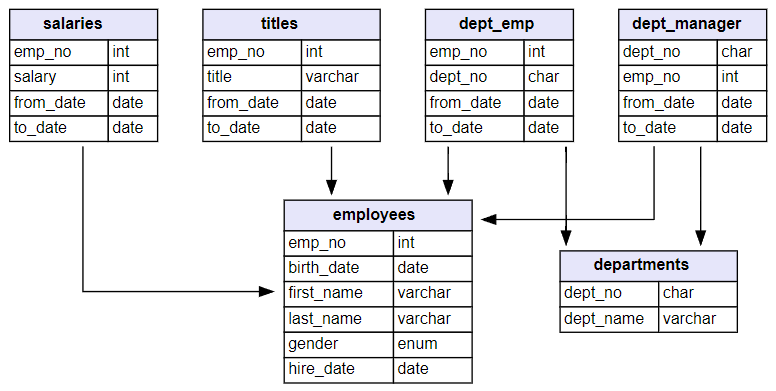

In [27]:
database_host = 'relational.fit.cvut.cz'
username = 'guest'
password = 'relational'
database_name = 'employee'

db = pymysql.connect(host=database_host,
                     user=username,
                     password=password,
                     database=database_name)
cursor = db.cursor()

In [28]:
query='SHOW TABLES'
pd.read_sql(query,db)

,Tables_in_employee
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


Obtener el salario máximo, mínimo y medio por género y cargo

In [29]:
query='''
SELECT * FROM employees
LIMIT 10
'''
pd.read_sql(query,db)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [30]:
query = '''
SELECT * from salaries
LIMIT 10
'''
pd.read_sql(query,db)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [31]:
query = '''
SELECT * FROM titles
LIMIT 10
'''
pd.read_sql(query,db)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
6,10005,Staff,1989-09-12,1996-09-12
7,10006,Senior Engineer,1990-08-05,9999-01-01
8,10007,Senior Staff,1996-02-11,9999-01-01
9,10007,Staff,1989-02-10,1996-02-11


In [35]:
query = '''
SELECT title, gender, MIN(salary), AVG(salary), MAX(salary), COUNT(salary)
FROM employees emp
    JOIN salaries sal
        ON emp.emp_no = sal.emp_no
    JOIN titles tit
        ON emp.emp_no = tit.emp_no
            WHERE sal.to_date = '9999-01-01'
            AND tit.to_date = '9999-01-01'
            GROUP BY title, gender
'''

Salarios = pd.read_sql(query,db)
Salarios

,title,gender,MIN(salary),AVG(salary),MAX(salary),COUNT(salary)
0,Assistant Engineer,M,39827,57197.9674,117636,2148
1,Assistant Engineer,F,39469,57495.9861,106340,1440
2,Engineer,M,38942,59592.9683,130939,18571
3,Engineer,F,39519,59617.3549,115444,12412
4,Manager,M,56654,79350.6000,106491,5
5,Manager,F,65400,75690.0000,83457,4
6,Senior Engineer,M,39285,70869.9085,140784,51533
7,Senior Engineer,F,39476,70753.8341,138273,34406
8,Senior Staff,M,39012,80735.4795,158220,49232
9,Senior Staff,F,39227,80662.9816,152710,32792


In [37]:
query = '''
SELECT COUNT(DISTINCT emp_no)
FROM titles
WHERE title = 'Manager'
AND to_date = '9999-01-01'
'''

pd.read_sql(query,db)

,COUNT(DISTINCT emp_no)
0,9


<a id="crear"></a>
## Crear bases de datos relacionales

Podemos crear nuestras propias bases de datos utilizando SQLite

In [38]:
import sqlite3

In [39]:
conn = sqlite3.connect('my_database.sqlite')
cursor = conn.cursor()

También podemos crear tablas a partir de dataframes

In [41]:
Salarios.to_sql('SALARY', conn, index=False)

14

In [42]:
pd.read_sql('SELECT * FROM SALARY', conn)

,title,gender,MIN(salary),AVG(salary),MAX(salary),COUNT(salary)
0,Assistant Engineer,M,39827,57197.9674,117636,2148
1,Assistant Engineer,F,39469,57495.9861,106340,1440
2,Engineer,M,38942,59592.9683,130939,18571
3,Engineer,F,39519,59617.3549,115444,12412
4,Manager,M,56654,79350.6000,106491,5
5,Manager,F,65400,75690.0000,83457,4
6,Senior Engineer,M,39285,70869.9085,140784,51533
7,Senior Engineer,F,39476,70753.8341,138273,34406
8,Senior Staff,M,39012,80735.4795,158220,49232
9,Senior Staff,F,39227,80662.9816,152710,32792


In [43]:
# Listar tablas
pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"',conn)

,name
0,SALARY


In [44]:
# Crear vistas
cursor.execute('''
CREATE VIEW INGENIEROS AS
SELECT * FROM SALARY
WHERE title = 'Engineer'
''')

conn.commit()

In [45]:
# Listar tablas
pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"',conn)

,name
0,SALARY


In [46]:
pd.read_sql('SELECT * FROM INGENIEROS', conn)

,title,gender,MIN(salary),AVG(salary),MAX(salary),COUNT(salary)
0,Engineer,M,38942,59592.9683,130939,18571
1,Engineer,F,39519,59617.3549,115444,12412


Existen aplicaciones gratuitas, como [DB Browser for SQLite](https://sqlitebrowser.org/) que nos operar con bases de datos SQL desde una interfaz 